In [10]:
import pandas as pd
import os

In [11]:
path = r'C:\Users\wierc\Desktop\pandas\sales\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data'
dfs = []

for filename in os.listdir(path):
    sample_df = pd.read_csv("C:/Users/wierc/Desktop/pandas/sales/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/"+filename)
    dfs.append(sample_df)


df = pd.concat(dfs, axis=0, ignore_index=True)

In [12]:
df = df[df['Order ID'].notna()]
df.insert(5, column='Month', value=1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,1,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,1,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,1,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,1,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,1,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,1,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,1,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,1,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,1,"511 Forest St, San Francisco, CA 94016"


In [16]:
temp_df = df[df['Month'].str[:2] == 'Or']
df = df[df['Month'].str[:2] != 'Or']
df = df[df['Quantity Ordered'].notna()]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,04,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,04,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,04,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,09,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,09,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,09,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,09,"511 Forest St, San Francisco, CA 94016"


In [17]:
df['Month'] = df['Order Date'].astype(str).str[:2]
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df.insert(4, column = 'Aggregate Price', value = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float))




## Aggregate Price with Group by Month

In [19]:
df.groupby(['Month']).sum().sort_values('Aggregate Price',ascending=False)

,Quantity Ordered,Aggregate Price
Month,,
12,28114,4.613443e+06
10,22703,3.736727e+06
04,20558,3.390670e+06
11,19798,3.199603e+06
05,18667,3.152607e+06
03,17005,2.807100e+06
07,16072,2.647776e+06
06,15253,2.577802e+06
08,13448,2.244468e+06


In [20]:
results = df.groupby(['Month']).sum().sort_values('Month', ascending=True)
results

,Quantity Ordered,Aggregate Price
Month,,
01,10903,1.822257e+06
02,13449,2.202022e+06
03,17005,2.807100e+06
04,20558,3.390670e+06
05,18667,3.152607e+06
06,15253,2.577802e+06
07,16072,2.647776e+06
08,13448,2.244468e+06
09,13109,2.097560e+06


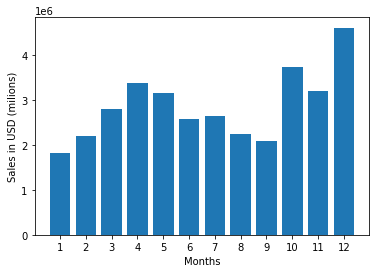

In [21]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Aggregate Price'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel("Sales in USD (milions)")
plt.show()

#### What city had the highest number of sales?

In [22]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)}) ")



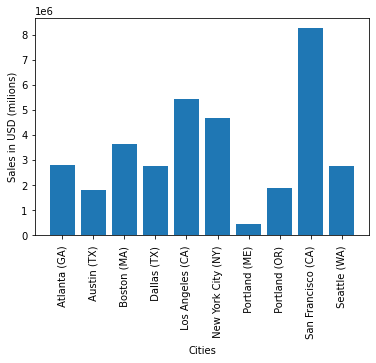

In [23]:
results = df.groupby(['City']).sum()

import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('City')]
plt.bar(cities, results['Aggregate Price'])
plt.xticks(cities, rotation='vertical')
plt.xlabel('Cities')
plt.ylabel("Sales in USD (milions)")
plt.show()

In [26]:
def get_daytime(date):
    return date.split(' ')[1].split(':')[0]


df['Hours'] = df['Order Date'].apply(lambda x: get_daytime(x))


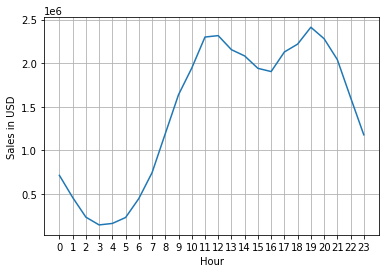

In [36]:
daytime_sales = df.groupby('Hours').sum()
daytime_sales


import matplotlib.pyplot as plt

daytimes = [daytime for daytime, df in df.groupby('Hours')]
hours = range(0,24)
plt.plot(hours, daytime_sales['Aggregate Price'])
plt.xticks(hours, rotation='horizontal', size=10)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Sales in USD")
plt.show()


In [37]:
data_orders = df[df['Order ID'].duplicated(keep=False)] 

data_orders['Products ordered'] = data_orders.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
data_orders = data_orders.drop_duplicates(subset=['Order ID'])
data_orders

d:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Aggregate Price,Order Date,Month,Purchase Address,City,Hours,Products ordered
3,176560,Google Phone,1,600,600.00,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600,600.00,04/03/19 19:42,04,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 11:31,04,"823 Highland St, Boston, MA 02215",Boston (MA),11,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,AAA Batteries (4-pack),2,2.99,5.98,04/10/19 17:00,04,"365 Center St, San Francisco, CA 94016",San Francisco (CA),17,"AAA Batteries (4-pack), Google Phone"
119,176672,Lightning Charging Cable,1,14.95,14.95,04/12/19 11:07,04,"778 Maple St, New York City, NY 10001",New York City (NY),11,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
186781,259296,Apple Airpods Headphones,1,150,150.00,09/28/19 16:48,09,"894 6th St, Dallas, TX 75001",Dallas (TX),16,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,iPhone,1,700,700.00,09/15/19 18:54,09,"138 Main St, Boston, MA 02215",Boston (MA),18,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,34in Ultrawide Monitor,1,379.99,379.99,09/20/19 20:18,09,"106 7th St, Atlanta, GA 30301",Atlanta (GA),20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,11.99,09/16/19 00:25,09,"241 Highland St, Atlanta, GA 30301",Atlanta (GA),00,"Wired Headphones, AAA Batteries (4-pack)"


In [64]:
data_orders['Count'] = data_orders.groupby("Products ordered")['Products ordered'].transform('count')
data_orders

,Order ID,Product,Quantity Ordered,Price Each,Aggregate Price,Order Date,Month,Purchase Address,City,Hours,Products ordered,Count
3,176560,Google Phone,1,600,600.00,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,"Google Phone, Wired Headphones",303
18,176574,Google Phone,1,600,600.00,04/03/19 19:42,04,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),19,"Google Phone, USB-C Charging Cable",856
30,176585,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 11:31,04,"823 Highland St, Boston, MA 02215",Boston (MA),11,"Bose SoundSport Headphones, Bose SoundSport He...",27
32,176586,AAA Batteries (4-pack),2,2.99,5.98,04/10/19 17:00,04,"365 Center St, San Francisco, CA 94016",San Francisco (CA),17,"AAA Batteries (4-pack), Google Phone",11
119,176672,Lightning Charging Cable,1,14.95,14.95,04/12/19 11:07,04,"778 Maple St, New York City, NY 10001",New York City (NY),11,"Lightning Charging Cable, USB-C Charging Cable",55
...,...,...,...,...,...,...,...,...,...,...,...,...
186781,259296,Apple Airpods Headphones,1,150,150.00,09/28/19 16:48,09,"894 6th St, Dallas, TX 75001",Dallas (TX),16,"Apple Airpods Headphones, Apple Airpods Headph...",24
186783,259297,iPhone,1,700,700.00,09/15/19 18:54,09,"138 Main St, Boston, MA 02215",Boston (MA),18,"iPhone, Lightning Charging Cable, Lightning Ch...",3
186791,259303,34in Ultrawide Monitor,1,379.99,379.99,09/20/19 20:18,09,"106 7th St, Atlanta, GA 30301",Atlanta (GA),20,"34in Ultrawide Monitor, AA Batteries (4-pack)",19
186803,259314,Wired Headphones,1,11.99,11.99,09/16/19 00:25,09,"241 Highland St, Atlanta, GA 30301",Atlanta (GA),00,"Wired Headphones, AAA Batteries (4-pack)",43


In [60]:
from collections import Counter
products = []
for data in data_orders['Products ordered']:
    products.append(data)
dict_products = Counter(products)
for key, value in dict_products.most_common(50):
    print(key, value)

iPhone, Lightning Charging Cable 882
Google Phone, USB-C Charging Cable 856
iPhone, Wired Headphones 361
Vareebadd Phone, USB-C Charging Cable 312
Google Phone, Wired Headphones 303
iPhone, Apple Airpods Headphones 286
Google Phone, Bose SoundSport Headphones 161
Vareebadd Phone, Wired Headphones 104
Google Phone, USB-C Charging Cable, Wired Headphones 77
Vareebadd Phone, Bose SoundSport Headphones 60
iPhone, Lightning Charging Cable, Wired Headphones 56
Lightning Charging Cable, USB-C Charging Cable 55
Lightning Charging Cable, AA Batteries (4-pack) 52
Lightning Charging Cable, Lightning Charging Cable 51
AA Batteries (4-pack), Lightning Charging Cable 51
AAA Batteries (4-pack), USB-C Charging Cable 50
AA Batteries (4-pack), AAA Batteries (4-pack) 48
AAA Batteries (4-pack), AAA Batteries (4-pack) 48
USB-C Charging Cable, USB-C Charging Cable 46
Apple Airpods Headphones, AAA Batteries (4-pack) 45
AA Batteries (4-pack), Wired Headphones 44
AAA Batteries (4-pack), Lightning Charging Cabl

In [65]:
most_bought = df.groupby('Product').sum(['Quantity ordered'])
most_bought.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Aggregate Price
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
27in FHD Monitor,7550,1132424.50
iPhone,6849,4794300.00


d:\python\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


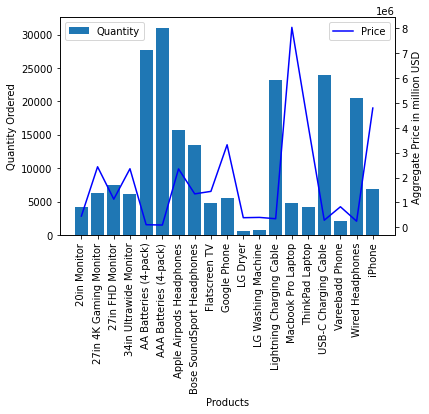

In [130]:
import matplotlib.pyplot as plt

products = [product for product, df in df.groupby(['Product'])]

fig, ax1 = plt.subplots()
ax1.bar(products, most_bought['Quantity Ordered'], label="Quantity")
ax1.set_xticklabels(products, rotation=90)
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")

ax2 = ax1.twinx()
ax2.plot(most_bought["Aggregate Price"], color='blue', label="Price")
ax2.set_ylabel("Aggregate Price in million USD")

legend_ax1 = ax1.legend(loc='upper left')
legend_ax2 = ax2.legend(loc='upper right')

legend_ax1.get_frame()
legend_ax2.get_frame()

plt.show()